In [1]:
import pandas as pd
import matplotlib.pyplot as plt

#output_file = "/net/vast-storage.ib.cluster/scratch/scratch/Mon/fabiocat/rer_wer/data/output.csv"
output_file = "../../data/output.csv"

df_output = pd.read_csv(output_file)

# Overall mean and standard deviation of WER
overall_mean_wer = df_output['wer'].mean()
overall_stdev_wer = df_output['wer'].std()

# Mean, standard deviation, and count of WER by grade
wer_by_grade = df_output.groupby('grade')['wer'].agg(['mean', 'std', 'count']).reset_index()

# Mean, standard deviation, and count of WER by school
wer_by_school = df_output.groupby('school')['wer'].agg(['mean', 'std', 'count']).reset_index()

# Mean and standard deviation of WER by file
wer_by_file = df_output.groupby('file')['wer'].agg(['mean', 'std']).reset_index()

# Mean, standard deviation, and count of WER by child
wer_by_child = df_output.groupby('identifier')['wer'].agg(['mean', 'std', 'count']).reset_index()

# Mean and standard deviation of WER by child and then by school
wer_by_child_school = df_output.groupby(['identifier', 'school'])['wer'].agg(['mean', 'std']).reset_index()

# Filtering for entries with score > 0.5
df_filtered = df_output[df_output['score'] > 0.5]

# Overall mean and standard deviation of WER for score > 0.5
overall_mean_wer_filtered = df_filtered['wer'].mean()
overall_stdev_wer_filtered = df_filtered['wer'].std()

# Mean and standard deviation of WER by grade for score > 0.5
wer_by_grade_filtered = df_filtered.groupby('grade')['wer'].agg(['mean', 'std']).reset_index()

# Mean and standard deviation of WER by school for score > 0.5
wer_by_school_filtered = df_filtered.groupby('school')['wer'].agg(['mean', 'std']).reset_index()

# Mean and standard deviation of WER by child for score > 0.5
wer_by_child_filtered = df_filtered.groupby('file')['wer'].agg(['mean', 'std']).reset_index()

# Mean and standard deviation of WER by child and then by school for score > 0.5
wer_by_child_school_filtered = df_filtered.groupby(['file', 'school'])['wer'].agg(['mean', 'std']).reset_index()

# Plotting
def plot_stats(df, title, xlabel=None):
    # Sort the DataFrame based on 'mean' values
    df_sorted = df.sort_values(by='mean')
    
    if xlabel:
        x_values = df_sorted[xlabel]
    else:
        x_values = df_sorted.index

    fig, ax = plt.subplots(figsize=(10, 6))
    ax.bar(x_values, df_sorted['mean'], yerr=df_sorted['std'], capsize=5)
    ax.set_title(f'Mean and Std Dev of WER by {title}')
    if xlabel:
        ax.set_xlabel(xlabel)
    else:
        ax.set_xticklabels([])
    ax.set_ylabel('WER')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


In [2]:
# Overall WER stats
print(f"Overall Mean WER: {overall_mean_wer}")
print(f"Overall Std Dev WER: {overall_stdev_wer}")

Overall Mean WER: 1.4761927033173825
Overall Std Dev WER: 2.9862815466043684


In [3]:
# Print WER stats by child
print("WER by Child:")
print(wer_by_child.sort_values(by='mean'))

WER by Child:
        identifier       mean        std  count
1040  11_22_0_4262   0.000000        NaN      1
2543  66_21_0_3459   0.000000   0.000000      2
2541  66_21_0_3452   0.000000   0.000000      2
2226  66_19_0_1234   0.000000   0.000000      4
2406  66_21_0_3185   0.000000   0.000000      2
...            ...        ...        ...    ...
2542  66_21_0_3457  12.000000   0.000000      2
2252  66_20_0_2042  12.500000   1.732051      4
501   11_20_0_2332  12.625000  19.144625     16
2563  66_21_0_3527  21.000000        NaN      1
1037  11_22_0_4259  28.520833  56.986125      4

[2671 rows x 4 columns]


In [4]:
# Print WER stats by school
print("WER by School:")
print(wer_by_school.sort_values(by='mean'))

WER by School:
                     school      mean       std  count
81                      Zeh  0.633087  1.259109    151
34                 FLVS - O  0.761859  1.109935     26
15              FLVA Rapoza  0.853225  1.694522    107
39                 FLVS - V  0.875000  1.034723     24
50  FLVS VanDeursen - White  0.894315  2.160641     25
..                      ...       ...       ...    ...
38                 FLVS - T  1.989568  3.157215    116
19                 FLVS - A  2.032016  5.397002    224
52           FLVS- Frantzis  2.072119  4.223967     64
7                Cherryvale  2.553996  3.264234   1427
29                 FLVS - J  2.737376  5.893343     80

[82 rows x 4 columns]


In [5]:
# Print WER stats by grade
print("WER by Grade:")
print(wer_by_grade.sort_values(by='mean'))

WER by Grade:
  grade      mean       std  count
1     2  1.180667  2.610791   8729
3    KG  1.387008  3.043485  42070
2     3  1.570315  4.268332   2212
0     1  1.826826  2.788264  17464


### Plotting for different groupings


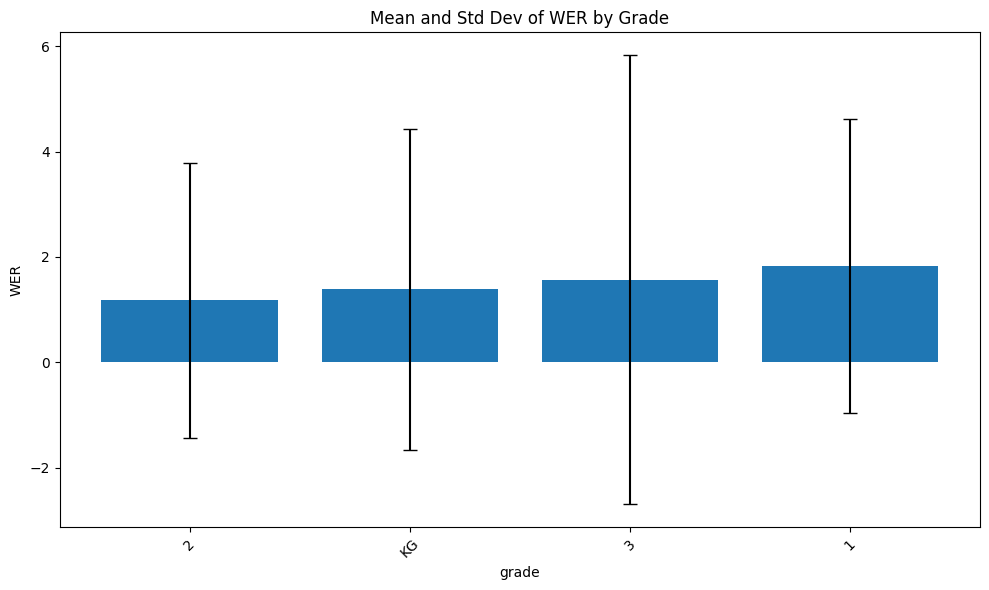

In [6]:
plot_stats(wer_by_grade, 'Grade', 'grade')

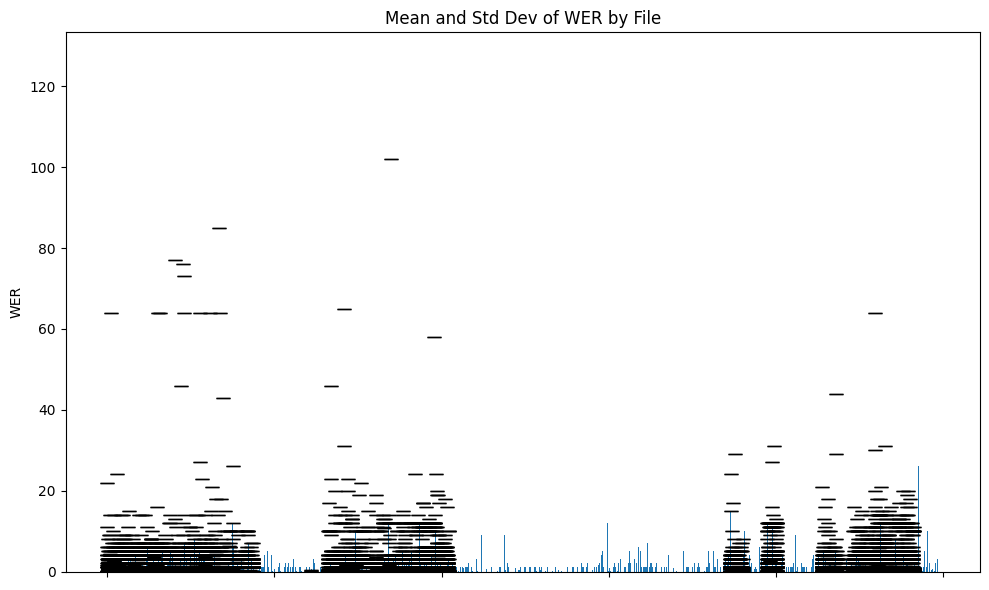

In [19]:
plot_stats(wer_by_file, 'File')


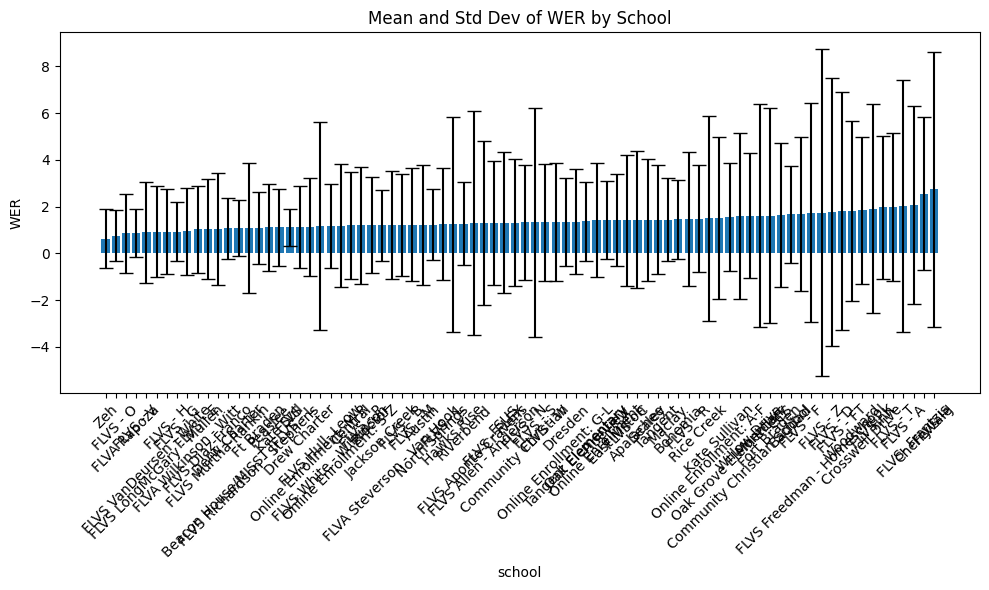

In [20]:
plot_stats(wer_by_school, 'School', 'school')

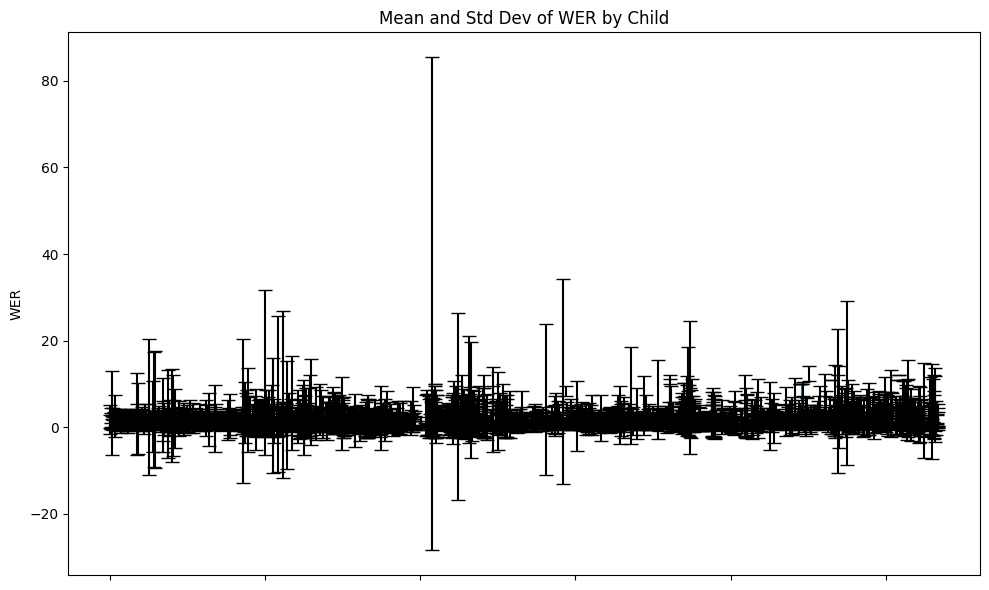

In [9]:
plot_stats(wer_by_child, 'Child')

In [10]:
df_output.sort_values(by='wer')

,file,school,grade,score,identifier,expected_text,transcription,wer
0,/om2/scratch/Sun/fabiocat/rer_wer/data/data/su...,Sealey,KG,1.0,11_19_0_1127,rock,rock,0.0
18912,/om2/scratch/Sun/fabiocat/rer_wer/data/data/su...,Sealey,KG,1.0,11_19_0_1128,mouse,mouse,0.0
18911,/om2/scratch/Sun/fabiocat/rer_wer/data/data/su...,Kate Sull,KG,1.0,11_19_0_1166,paper,paper,0.0
18910,/om2/scratch/Sun/fabiocat/rer_wer/data/data/su...,Kate Sull,KG,1.0,11_19_0_1165,cupcake,cupcake,0.0
18909,/om2/scratch/Sun/fabiocat/rer_wer/data/data/su...,Willow Drive,KG,1.0,66_19_0_1069,butterfly,butterfly,0.0
...,...,...,...,...,...,...,...,...
46639,/om2/scratch/Sun/fabiocat/rer_wer/data/data/su...,Hawks Rise,KG,1.0,11_19_0_1232,vohp,the time frame is going to be ending soon well...,96.0
44235,/om2/scratch/Sun/fabiocat/rer_wer/data/data/su...,FLVS - FT,KG,1.0,11_21_0_3044,kefnuhvohkmerforb,just try your best say anything you remember w...,102.0
44234,/om2/scratch/Sun/fabiocat/rer_wer/data/data/su...,FLVS - S,KG,1.0,11_21_0_3044,kefnuhvohkmerforb,just try your best say anything you remember w...,102.0
55811,/om2/scratch/Sun/fabiocat/rer_wer/data/data/su...,FSUS,3,1.0,11_22_0_4259,NaN,cook the dinner then you may have cake and lun...,114.0
